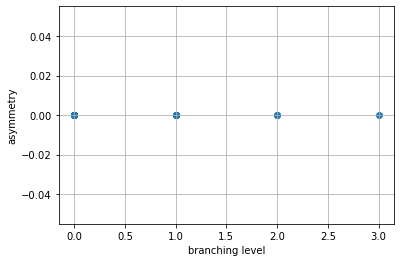

In [1]:
import sys
sys.path.insert(0,'../cycle_analysis')
import cycle_tools_coalescence as ctc
import test as cat
import networkx as nx
import matplotlib.pyplot as plt
# import cycle_analysis.cycle_tools_coalescence as ctc
# import cycle_analysis.test as cat

# generate a dummy graph for testing
# put an edge weight distribution on the system, available are random/gradient/bigradient/nested_square
n=7
G=nx.grid_graph(( n,n,1))
G=cat.generate_pattern(G,'nested_square')

weights=[G.edges[e]['weight'] for e in G.edges()]
pos=nx.get_node_attributes(G,'pos')

# merge all shortest cycles and create merging tree, then calc asymmetry of the tree's branches
T=ctc.coalescence()
minimum_basis=T.construct_networkx_basis(G)
cycle_tree=T.calc_cycle_coalescence(G,minimum_basis)
dict_asymmetry=T.calc_tree_asymmetry()

# plot branching asymmetry in dependence of branching level
x,y=[],[]
for n in dict_asymmetry:
    x.append((cycle_tree.nodes[n]['pos'][1]-6)/2.)
    y.append(dict_asymmetry[n])
plt.scatter(x,y)
plt.ylabel('asymmetry')
plt.xlabel('branching level')
plt.grid(True)
plt.show()